In [2]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install scipy
!pip3 install scikit-learn

In [3]:
# Importing the module for download files from ftp
import requests
import os
import shutil
import zipfile 
#import sklearn
from scipy.spatial import distance

### **TASK 1 : Perform basic data engineering (40%)**

**Task 1 -> Step 1 :  Downloading the file locally**

In [300]:
# executing year loop for 1975 to 2020
for year in range(1975,2021,5):
    
    # FTP path for downloading files per year wise
    url = f'https://static.nhtsa.gov/nhtsa/downloads/FARS/{year}/National/FARS{year}NationalCSV.zip'
    print(f'Downloading started for year : {year}')
    
    # Downloading the file by sending the request to the URL
    req = requests.get(url)
 
    # Split URL to get the file name
    filename = url.split('/')[-1]
 
    # Writing the file to the local file system
    with open(filename,'wb') as output_file:
        output_file.write(req.content)
    
    print(f'Downloading Completed for year : {year}')

**Task 1 -> Step 2 :  Extracting the file in respective year folder**


In [301]:
# executing year loop for 1975 to 2020
for year in range(1975,2021,5):
    directory = f'{year}'
    print(f'Creating Folder {directory}',end=' and ')
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    filename = f'FARS{year}NationalCSV.zip'
    print(f'Extracting file into {directory} Directory.')
    with zipfile.ZipFile(filename,"r") as zip_ref:
        zip_ref.extractall(directory)

Creating Folder 1975 and Extracting file into 1975 Directory.
Creating Folder 1980 and Extracting file into 1980 Directory.
Creating Folder 1985 and Extracting file into 1985 Directory.
Creating Folder 1990 and Extracting file into 1990 Directory.
Creating Folder 1995 and Extracting file into 1995 Directory.
Creating Folder 2000 and Extracting file into 2000 Directory.
Creating Folder 2005 and Extracting file into 2005 Directory.
Creating Folder 2010 and Extracting file into 2010 Directory.
Creating Folder 2015 and Extracting file into 2015 Directory.
Creating Folder 2020 and Extracting file into 2020 Directory.


**Task 3 -> Step 3: move all the accident.csv file from years to folder accident_all_years**

In [302]:
#creating a directory name accident_all_years
directory = 'accident_all_years'
print(f'Creating Folder {directory}.')
if not os.path.exists(directory):
    os.makedirs(directory)

Creating Folder accident_all_years.


In [303]:
#copy each year file to the accident_all_years directory
for year in range(1975,2021,5):
    for file in ['ACCIDENT.CSV' , 'accident.csv', 'accident.CSV']:
        try:
            source = f'{year}/{file}'
            destination = f'{directory}/{year}_ACCIDENT.CSV'
            shutil.copyfile(source, destination)
            break
        except:
            print(f"{source} file not found!")

2015/ACCIDENT.CSV file not found!
2020/ACCIDENT.CSV file not found!
2020/accident.csv file not found!


### **Task 2 : Manipulate and analyze the data from NHTSA**

**Task: PART 1 (Descriptive Statistics / Exploratory Data Analysis)

In [4]:
#importing the module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
directory = 'accident_all_years'

In [6]:
totalAccidents = 0
fatalAccidents = 0
for year in range(1975,2021,5):
    filename = f'{directory}/{year}_ACCIDENT.CSV'
    df = pd.read_csv(filename,encoding='latin-1')
    totalAccidents += df.shape[0]
    fatalAccidents += df.loc[df.FATALS>0,'FATALS'].count()
print(f'Overal Number of Fatal Accidents for the entire dataset period from 1975-2020 is {fatalAccidents} / {totalAccidents}')

Overal Number of Fatal Accidents for the entire dataset period from 1975-2020 is 376086 / 376096


In [7]:
peopleInvolved = 0
peopleFatality = 0
for year in range(1975,2021,5):
    filename = f'{directory}/{year}_ACCIDENT.CSV'
    df = pd.read_csv(filename,encoding='latin-1')
    peopleInvolved += df.loc[:,'PERSONS'].sum()
    peopleFatality += df.loc[:,'FATALS'].sum()
print(f'People Died over that period : {peopleFatality}')
print(f'Fatal vs Non-fatal           : {peopleFatality} / {peopleInvolved}')

People Died over that period : 418619
Fatal vs Non-fatal           : 418619 / 955696


In [8]:
overnightAccident = 0
totalAccidents = 0
for year in range(1975,2021,5):
    filename = f'{directory}/{year}_ACCIDENT.CSV'
    df = pd.read_csv(filename,encoding='latin-1')
    totalAccidents += df.shape[0]
    overnightAccident += df.loc[(((df.HOUR >= 21) | (df.HOUR <= 4)) & (df.HOUR != 99) & (df.HOUR != 88 )),'HOUR'].count()
print(f'Overnmight accident between 9pm and 4 am : {overnightAccident*100.0/totalAccidents:0.2f} %  real number is {overnightAccident} / {totalAccidents}')

Overnmight accident between 9pm and 4 am : 35.10 %  real number is 132022 / 376096


In [9]:
snowyAccidents = 0
totalAccidents = 0
for year in range(1975,2021,5):
    filename = f'{directory}/{year}_ACCIDENT.CSV'
    df = pd.read_csv(filename,encoding='latin-1')
    totalAccidents += df.shape[0]
    snowyAccidents += df.loc[df.WEATHER == 4,'WEATHER'].count()
print(f'Accident percenatage at Snowy Weather : {snowyAccidents*100.0/totalAccidents:0.2f} %')

Accident percenatage at Snowy Weather : 1.63 %


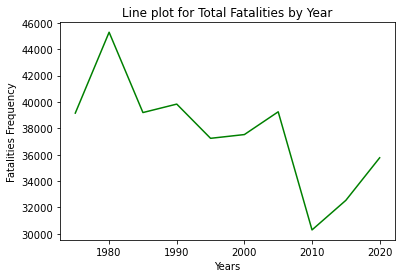

In [10]:
years = []
fatalities = []
for year in range(1975,2021,5):
    filename = f'{directory}/{year}_ACCIDENT.CSV'
    df = pd.read_csv(filename,encoding='latin-1')
    years.append(year)
    fatalities.append(df.loc[df.FATALS>0,'FATALS'].count())
    
x = np.array(years,dtype='int64')
y = np.array(fatalities,dtype='int64')
plt.plot(x,y,c='g')
plt.ylabel('Fatalities Frequency')
plt.xlabel('Years')
plt.title('Line plot for Total Fatalities by Year')
plt.show()

#### From the above line plot, I have observed that number of fatalities in accidents has reduced a lot due to improvement in quick medical treatments, strict law-inforcements,  and better infrastructures of roads and signals.

### Task: (Descriptive Statistics / Exploratory Data Analysis)

In [11]:
drunkDriverAccidents = 0
totalAccidents = 0
for year in range(1975,2021,5):
    filename = f'{directory}/{year}_ACCIDENT.CSV'
    df = pd.read_csv(filename,encoding='latin-1')
    totalAccidents += df.shape[0]
    drunkDriverAccidents += df.loc[df.DRUNK_DR != 0,'DRUNK_DR'].count()
print(f'Average mean of fatal accidents due to intoxicated Driver : {drunkDriverAccidents/totalAccidents:0.2f}')

Average mean of fatal accidents due to intoxicated Driver : 0.33


In [12]:
accidents = {}
for year in range(1975,1979,5):
    filename = f'{directory}/{year}_ACCIDENT.CSV'
    df = pd.read_csv(filename,encoding='latin-1')
    #print(df.loc[((df.DRUNK_DR != 0) & (df.FATALS > 0)),:].groupby('STATE').agg('count').apply(list))
    d = df.loc[((df.DRUNK_DR != 0) & (df.FATALS > 0)),:].groupby('STATE').agg('count').apply(list).to_dict()
    for key in d['COUNTY'].keys():
        if key not in accidents:
            accidents[key] = d['COUNTY'][key]
        else:
            accidents[key] += d['COUNTY'][key]

In [13]:
print('Top 5 states in 1975, which has highest rate of fatal accidents :')
counter = 0
for state, fatalAccidents in sorted(accidents.items(), key=lambda x : x[1],reverse=True):
    if counter == 5:
        break
    counter += 1
    print(f'{state} : {fatalAccidents}')

Top 5 states in 1975, which has highest rate of fatal accidents :
6 : 1450
26 : 424
17 : 387
12 : 384
47 : 333


In [14]:
print('the Top 5 states in 1975, which has least rate of fatal accidents :')
counter = 0
for state, fatalAccidents in sorted(accidents.items(), key=lambda x : x[1]):
    if counter == 5:
        break
    counter += 1
    print(f'{state} : {fatalAccidents}')

the Top 5 states in 1975, which has least rate of fatal accidents :
35 : 5
37 : 5
28 : 9
18 : 12
1 : 14


In [15]:
accidents = {}
for year in range(1990,1994,5):
    filename = f'{directory}/{year}_ACCIDENT.CSV'
    df = pd.read_csv(filename,encoding='latin-1')
    #print(df.loc[((df.DRUNK_DR != 0) & (df.FATALS > 0)),:].groupby('STATE').agg('count').apply(list))
    d = df.loc[((df.DRUNK_DR != 0) & (df.FATALS > 0)),:].groupby('STATE').agg('count').apply(list).to_dict()
    for key in d['COUNTY'].keys():
        if key not in accidents:
            accidents[key] = d['COUNTY'][key]
        else:
            accidents[key] += d['COUNTY'][key]

In [16]:
print('Top 5 states in 1990, which has highest rate of fatal accidents :')
counter = 0
for state, fatalAccidents in sorted(accidents.items(), key=lambda x : x[1],reverse=True):
    if counter == 5:
        break
    counter += 1
    print(f'{state} : {fatalAccidents}')

Top 5 states in 1990, which has highest rate of fatal accidents :
6 : 1975
48 : 1265
12 : 1068
42 : 623
26 : 617


In [17]:
print('the Top 5 states in 1990, which has least rate of fatal accidents :')
counter = 0
for state, fatalAccidents in sorted(accidents.items(), key=lambda x : x[1]):
    if counter == 5:
        break
    counter += 1
    print(f'{state} : {fatalAccidents}')

the Top 5 states in 1990, which has least rate of fatal accidents :
11 : 20
2 : 41
44 : 41
50 : 44
38 : 48


In [18]:
accidents = {}
for year in range(1975,2020,5):
    filename = f'{directory}/{year}_ACCIDENT.CSV'
    df = pd.read_csv(filename,encoding='latin-1')
    d = df.loc[((df.DRUNK_DR != 0) & (df.FATALS > 0)),:].groupby('STATE').agg('count').apply(list).to_dict()
    for key in d['COUNTY'].keys():
        if key not in accidents:
            accidents[key] = d['COUNTY'][key]
        else:
            accidents[key] += d['COUNTY'][key]

In [19]:
print(f'Mean rate of fatal accidents in 2020 : {sum(accidents.values())/len(accidents.keys()):0.0f}')

Mean rate of fatal accidents in 2020 : 2263


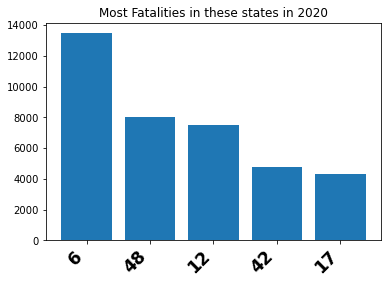

In [20]:
states = []
fatalities = []
counter = 0
for state, fatalAccidents in sorted(accidents.items(), key=lambda x : x[1],reverse=True):
    if counter == 5:
        break
    counter += 1
    states.append(state)
    fatalities.append(fatalAccidents)   
x = np.array(states,dtype='int64')
y = np.array(fatalities,dtype='int64')


y_pos = np.arange(len(x))

plt.title('Most Fatalities in these states in 2020')   
# Basic plot
plt.bar(y_pos, y)
 
# use the plt.xticks function to custom labels
plt.xticks(y_pos, x, color='black', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')
plt.show()

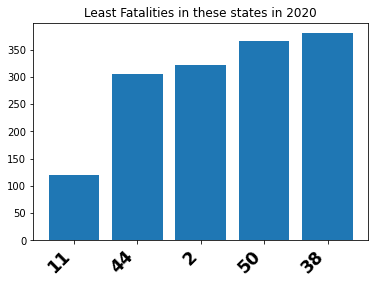

In [21]:
states = []
fatalities = []
counter = 0
for state, fatalAccidents in sorted(accidents.items(), key=lambda x : x[1]):
    if counter == 5:
        break
    counter += 1
    states.append(state)
    fatalities.append(fatalAccidents)   
x = np.array(states,dtype='int64')
y = np.array(fatalities,dtype='int64')


y_pos = np.arange(len(x))

plt.title('Least Fatalities in these states in 2020')   
# Basic plot
plt.bar(y_pos, y)
 
# use the plt.xticks function to custom labels
plt.xticks(y_pos, x, color='black', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')
plt.show()

### The number of fatalities accident has reduced over the time from the number which I observed from 1975 to 2020.

## Select the subset of data

In [22]:
dataframes = []
for year in range(1975,2020,5):
    filename = f'{directory}/{year}_ACCIDENT.CSV'
    df = pd.read_csv(filename,encoding='latin-1')
    names = df.columns
    for column in names:
        if column not in ['STATE','MONTH','DAY','YEAR','HOUR','PERSONS','MAN_COLL','LGT_COND','WEATHER','SCH_BUS','FATALS','DAY_WEEK','DRUNK_DR']:
            df.drop(column, axis=1, inplace=True)
    dataframes.append(df)
finalDf = pd.concat(dataframes,axis=0)

In [23]:
finalDf.shape

(340330, 13)

In [24]:
indexes = np.random.randint(finalDf.shape[0],size=5000)

In [25]:
newdf = finalDf.iloc[indexes]
newdf.dropna(axis=0,inplace=True)
newdf.shape

/var/folders/c_/13p7yhr12753f7pjj8mfmdzm0000gw/T/ipykernel_51291/2823167956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.dropna(axis=0,inplace=True)


(4423, 13)

In [26]:
newdf.head()
subdf = newdf.drop('YEAR', axis=1)

In [27]:
#Scaling the dataset between 0 to 1
subdf = (subdf - subdf.min())/(subdf.max() - subdf.min())

In [28]:
subdf.head()

,STATE,MONTH,DAY,HOUR,PERSONS,MAN_COLL,LGT_COND,WEATHER,SCH_BUS,FATALS,DAY_WEEK,DRUNK_DR
26849,0.836364,1.000000,0.142857,0.202020,0.018868,0.000000,0.25,0.0,0.0,0.0,0.250,0.00
15112,0.363636,0.818182,0.265306,0.131313,0.113208,0.181818,0.00,0.0,0.0,0.0,0.625,0.00
29690,0.745455,0.363636,0.244898,0.101010,0.018868,0.000000,0.00,0.0,0.0,0.0,0.375,0.00
35235,0.854545,0.090909,0.163265,0.050505,0.018868,0.000000,0.25,0.0,0.0,0.0,0.750,0.25
14005,0.327273,0.727273,0.010204,0.131313,0.056604,0.000000,0.00,0.0,0.0,0.0,0.750,0.00


In [29]:
from scipy.spatial import distance
ary = distance.cdist(subdf.iloc[:,:], subdf.iloc[:,:], metric='euclidean')
ary.shape

(4423, 4423)

In [30]:
indexes = np.random.randint(5000,size=2)
subdf.iloc[indexes]

,STATE,MONTH,DAY,HOUR,PERSONS,MAN_COLL,LGT_COND,WEATHER,SCH_BUS,FATALS,DAY_WEEK,DRUNK_DR
33383,0.836364,0.636364,0.306122,0.232323,0.207547,0.545455,0.25,0.0,0.0,0.0,0.625,0.25
12634,0.290909,0.181818,0.010204,0.090909,0.037736,0.000000,0.00,0.0,0.0,0.0,0.625,0.00


In [40]:
minIndex = []
for i in indexes :
    for j in range(subdf.shape[0]):
        if i != j:
            distance = ary[i][j]
            minIndex.append((distance,j))
    counter = 0
    for s in sorted(minIndex,key=lambda x : x[1]):
        if counter == 20:
            break
        print(s[1],end=',')
        counter +=1
    print('\n')
        

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,

